In [160]:
import os  
import numpy as np
from matplotlib import pyplot
import pandas as pd
from numpy import genfromtxt

In [161]:
data=pd.read_csv("house_prices_data_training_data1.csv")
data = data.replace(np.nan, 0)
print(data)


                 id             date     price  bedrooms  bathrooms  \
0      7.129301e+09  20141013T000000  221900.0       3.0       1.00   
1      6.414100e+09  20141209T000000  538000.0       3.0       2.25   
2      5.631500e+09  20150225T000000  180000.0       2.0       1.00   
3      2.487201e+09  20141209T000000  604000.0       4.0       3.00   
4      1.954401e+09  20150218T000000  510000.0       3.0       2.00   
...             ...              ...       ...       ...        ...   
21602  0.000000e+00                0       0.0       0.0       0.00   
21603  0.000000e+00                0       0.0       0.0       0.00   
21604  0.000000e+00                0       0.0       0.0       0.00   
21605  0.000000e+00                0       0.0       0.0       0.00   
21606  0.000000e+00                0       0.0       0.0       0.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0         0.0   0.0  ...    7.0   
1      

In [162]:
columns =data.columns[3:] # starting from the 3rd column 
standarddef=data[columns].std()
mean=data[columns].mean()
featurenorm = (data[columns]-mean)/standarddef
print(featurenorm)
data[columns] = featurenorm
print(data.size)

       bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0      0.130950  -0.693278    -0.470613 -0.190787 -0.273571   -0.081045   
1      0.130950   0.514779     0.765496 -0.150167  1.137686   -0.081045   
2     -0.528437  -0.693278    -0.835221 -0.079795 -0.273571   -0.081045   
3      0.790337   1.239613     0.223031 -0.207373 -0.273571   -0.081045   
4      0.130950   0.273167    -0.025970 -0.128785 -0.273571   -0.081045   
...         ...        ...          ...       ...       ...         ...   
21602 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   
21603 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   
21604 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   
21605 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   
21606 -1.847211  -1.659724    -1.519972 -0.334950 -1.684828   -0.081045   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
0     -0.281852   0.08

In [163]:
#from sklearn.model_selection import train_test_split
#train,test = train_test_split(data)
#print(train.size)
#print(test.size)
train, validate , test = np.split(data.sample(frac=1),[int(.6*len(data)),int(.8*len(data))])

In [164]:
train = train.to_numpy()
print(train)
validate=validate.to_numpy()
test=test.to_numpy()
print(test.size)



[[255400060.0 '20141208T000000' 910000.0 ... -0.44430769892820254
  1.884041416696757 -0.10943941978678597]
 [0.0 0 0.0 ... 2.2334651927855695 -1.7145227570839014
  -0.4347293252793187]
 [1330910280.0 '20150427T000000' 864000.0 ... -0.4436276156933743
  1.2373429274955952 3.0329341484673855]
 ...
 [3179101945.0 '20140715T000000' 864000.0 ... -0.449090219740865
  0.6219363006751347 -0.1754089512908278]
 [2922703260.0 '20140716T000000' 469000.0 ... -0.45104271676988805
  -0.5880157113786519 -0.25556252143272495]
 [0.0 0 0.0 ... 2.2334651927855695 -1.7145227570839014
  -0.4347293252793187]]
90762


In [165]:

train_x = train[:,[3,4]] #bathroom and bedrooms as features



In [166]:
train_y =train[:,2]  # price as our predicted value

In [167]:

trainn =train_y.size
print(trainn)

12964


In [168]:
train_x = np.concatenate([np.ones((trainn,1)), train_x], axis =1)
print(train_x)

[[1.0 1.4497233687483166 0.9980014437909744]
 [1.0 -1.8472109359085485 -1.659723924902666]
 [1.0 0.7903365078169436 0.7563900466370072]
 ...
 [1.0 0.7903365078169436 0.03155585517510515]
 [1.0 0.13094964688557056 0.03155585517510515]
 [1.0 -1.8472109359085485 -1.659723924902666]]


In [169]:
def computeCostMulti(train_x, train_y, theta):
    
    train_m = train_y.shape[0]  
    h=np.dot(train_x,theta)
    j = (1/(2 * train_m)) * np.sum((np.square(h - train_y)))
    
    
    return j


In [170]:
def gradientDescentMulti(train_x,train_y, theta, alpha, num_iters):
    
    
    train_m = train_y.shape[0] #number of trainig examples 
    
    #Make a copy of theta, which will be updated by Gradient Descent 
    
    theta = theta.copy()
    j_history= []
    
    for i in range(num_iters):
        h=np.dot(train_x,theta)
        theta =theta-((alpha/train_m)*(np.dot(train_x.T,h- train_y)))    
        j_history.append(computeCostMulti(train_x, train_y, theta))
    return theta, j_history

Text(0, 0.5, 'Cost j')

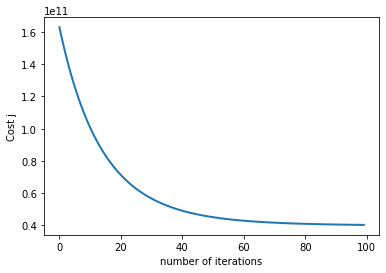

In [171]:
# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(train_x, train_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of iterations')
pyplot.ylabel('Cost j')



In [172]:
def computeCostMulti2(train_x, train_y, theta):
    
    

    train_m = train_y.shape[0]  #number of training examples 
    h=np.dot(np.square(train_x),theta)
    j = (1/(2 * train_m)) * np.sum((np.square(h - train_y)))
    

    return j


In [173]:
def gradientDescentMulti2(train_x, train_y, theta, alpha, num_iters):
    train_m = train_y.shape[0]
    theta=theta.copy()
    j_history = []
    for i in range(num_iters):
        h=np.dot(np.square(train_x),theta)
        theta = theta-((alpha/train_m)*(np.dot(np.square(train_x).T,h-train_y)))
        j_history.append(computeCostMulti2(train_x, train_y, theta))
     
    return theta, j_history

Text(0, 0.5, 'cost j')

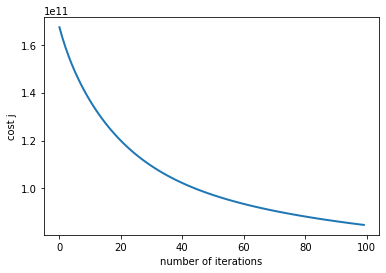

In [174]:
alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_history = gradientDescentMulti2(train_x, train_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of iterations')
pyplot.ylabel('cost j')

In [175]:
def computeCostMulti3(train_x, train_y, theta):
    
    

    train_m = train_y.shape[0]  #number of training examples 
    h=np.dot(np.power(train_x,3),theta)
    j = (1/(2 * train_m)) * np.sum((np.square(h - train_y)))

    return j

In [176]:
def gradientDescentMulti3(train_x, train_y, theta, alpha, num_iters):
    train_m = train_y.shape[0]
    theta=theta.copy()
    j_history = []
    for i in range(num_iters):
        sumofh0x=np.dot(np.power(train_x,3),theta)
        theta = theta-((alpha/train_m)*(np.dot(np.power(train_x,3).T,sumofh0x -train_y)))
        j_history.append(computeCostMulti3(train_x, train_y, theta))
     
    return theta, j_history

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0, 0.5, 'cost j')

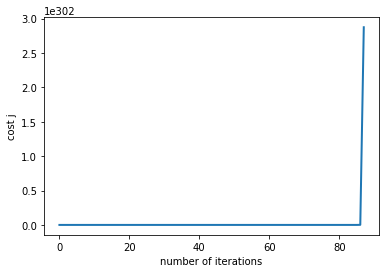

In [177]:
alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_history = gradientDescentMulti3(train_x, train_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_history)), j_history, lw=2)

pyplot.xlabel('number of iterations')
pyplot.ylabel('cost j')

In [178]:
validate_x = validate[:,[3,4]]

In [179]:
validate_y =validate[:,2]

In [180]:

validate_m =validate_y.size

In [181]:
validate_x = np.concatenate([np.ones((validate_m,1)), validate_x], axis =1)

Text(0, 0.5, 'Cost j')

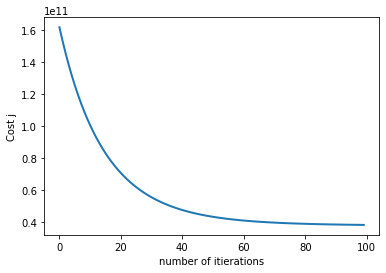

In [182]:
# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(validate_x, validate_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itierations')
pyplot.ylabel('Cost j')

Text(0, 0.5, 'cost j')

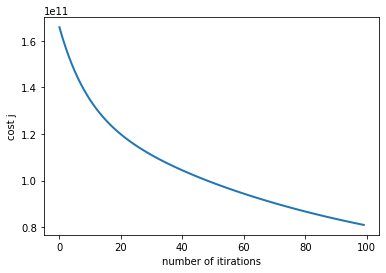

In [183]:

alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_history = gradientDescentMulti2(validate_x, validate_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itirations')
pyplot.ylabel('cost j')

Text(0, 0.5, 'cost j')

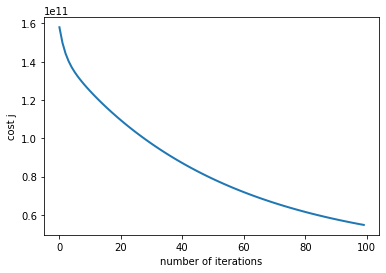

In [184]:

alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_history = gradientDescentMulti3(validate_x, validate_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of iterations')
pyplot.ylabel('cost j')

In [185]:
test_x = test[:,[3,4]]
test_y =test[:,2]
test_m =test_y.size

In [186]:
test_x = np.concatenate([np.ones((test_m,1)), test_x], axis =1)


Text(0, 0.5, 'Cost j')

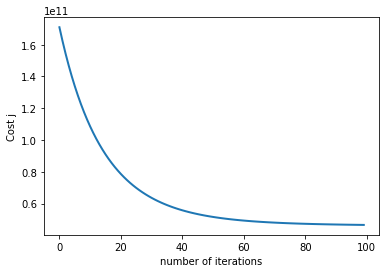

In [187]:
# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(3) 
theta, j_history = gradientDescentMulti(test_x, test_y, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of iterations')
pyplot.ylabel('Cost j')



Text(0, 0.5, 'cost j')

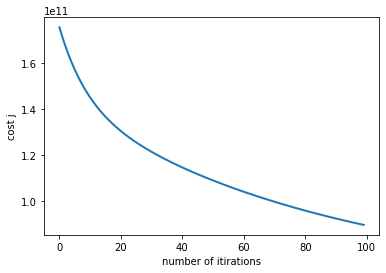

In [188]:

alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_history = gradientDescentMulti2(test_x, test_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of itirations')
pyplot.ylabel('cost j')

Text(0, 0.5, 'cost j')

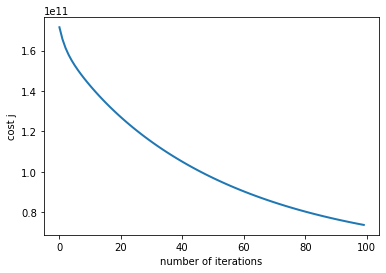

In [189]:
alpha=0.01
num_iters = 100
theta = np.zeros(3)
#intiate theta and run gradient descent 

theta, j_history = gradientDescentMulti3(test_x, test_y, theta, alpha, num_iters)

#plot the convergence graph

pyplot.plot(np.arange(len(j_history)), j_history, lw=2)
pyplot.xlabel('number of iterations')
pyplot.ylabel('cost j')

### 